# Working With Image Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

%matplotlib inline

In [2]:
images = load_digits(return_X_y=True, as_frame=True)

In [3]:
data = images[0]
target = images[1]

In [4]:
data.head(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


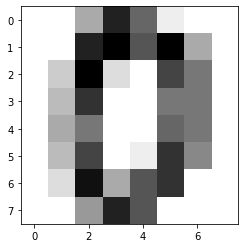

In [5]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

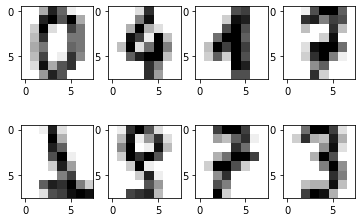

In [6]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[100].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[200].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[300].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[1000].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1100].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1200].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1300].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors Model

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def train_knc(train_data, train_target, k):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(train_data, train_target)
    return knc

def test(test_data, test_target, model):
    predictions = model.predict(test_data)
    acc = accuracy_score(test_target, predictions)
    return acc

def cross_validate_knc(k):
    accuracies = []
    kf = KFold(n_splits = 4, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(data):
        train_data, test_data = data.loc[train_index], data.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train_knc(train_data, train_target, k)
        acc = test(test_data, test_target, model)
        accuracies.append(acc)
    mean_acc = np.mean(accuracies)
    return mean_acc

In [19]:
neighbors = [1, 5, 10]
for k in neighbors:
    knc_acc = cross_validate_knc(k)
    print('accuracy of {} is {}'.format(k, knc_acc))

accuracy of 1 is 0.9827456075228903
accuracy of 5 is 0.9832999257609502
accuracy of 10 is 0.9782887899034892


## Neural Network With One Hidden Layer

In [20]:
from sklearn.neural_network import MLPClassifier

def train_mlp(train_data, train_target, neurons):
    mlp = MLPClassifier(hidden_layer_sizes = neurons)
    mlp.fit(train_data, train_target)
    return mlp

def test(test_data, test_target, model):
    predictions = model.predict(test_data)
    acc = accuracy_score(test_target, predictions)
    return acc

def cross_validate_mlp(neurons):
    accuracies = []
    kf = KFold(n_splits = 4, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(data):
        train_data, test_data = data.loc[train_index], data.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train_mlp(train_data, train_target, neurons)
        acc = test(test_data, test_target, model)
        accuracies.append(acc)
    mean_acc = np.mean(accuracies)
    return mean_acc

In [21]:
neurons_list = [(1,) , (8,), (16,), (32,), (64,), (128,), (256,)]

for n in neurons_list:
    knc_acc = cross_validate_mlp(n)
    print('accuracy of {} is {}'.format(n, knc_acc))

C:\Users\Abder\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Abder\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy of (1,) is 0.13246844840386043


C:\Users\Abder\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Abder\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Abder\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Abder\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy of (8,) is 0.9315478841870823


C:\Users\Abder\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Abder\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Abder\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Abder\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy of (16,) is 0.9521380846325167


C:\Users\Abder\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Abder\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Abder\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy of (32,) is 0.9510232615689185
accuracy of (64,) is 0.9705011135857461
accuracy of (128,) is 0.9682764167285326
accuracy of (256,) is 0.9738418708240535


### Summary:

It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 93% to approximately 97%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 98% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.


## Neural Network With two Hidden Layers

In [22]:
layers_two_neurons = [(64, 64) , (128, 128), (256, 256)]

for l in layers_two_neurons:
    knc_acc = cross_validate_mlp(l)
    print('accuracy of {} is {}'.format(l, knc_acc))

accuracy of (64, 64) is 0.9671640682999258
accuracy of (128, 128) is 0.9755122494432071
accuracy of (256, 256) is 0.9771813907448651


### Summary

Using 2 hidden layers improved our simple accuracy to approximately 98%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.


## Neural Network With Three Hidden Layers

In [24]:
def train_mlp_iter(train_data, train_target, neurons):
    mlp = MLPClassifier(hidden_layer_sizes = neurons, max_iter=1000)
    mlp.fit(train_data, train_target)
    return mlp

def cross_validate_six(neurons):
    accuracies = []
    kf = KFold(n_splits = 6, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(data):
        train_data, test_data = data.loc[train_index], data.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train_mlp_iter(train_data, train_target, neurons)
        acc = test(test_data, test_target, model)
        accuracies.append(acc)
    mean_acc = np.mean(accuracies)
    return mean_acc

layers_three_neurons = [(10, 10, 10) , (64, 64, 64), (128, 128, 128)]

for l in layers_three_neurons:
    knc_acc = cross_validate_six(l)
    print('accuracy of {} is {}'.format(l, knc_acc))

accuracy of (10, 10, 10) is 0.9343459680416202
accuracy of (64, 64, 64) is 0.9732943143812708
accuracy of (128, 128, 128) is 0.9799665551839465


### Summary

Using 3 hidden layers improved our simple accuracy to 98%, even with 6-fold cross validation and 1000 iterations. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.


## Neural Network With Three Hidden Layers (Without Cross Validation)

In [13]:
train_index = round(len(data)/2)
train_data = data[:train_index]
test_data = data[train_index:]

train_target = target[:train_index]
test_target = target[train_index:]

def train(train_data, train_target, neurons):
    mlp = MLPClassifier(hidden_layer_sizes = neurons, max_iter=1000)
    mlp.fit(train_data, train_target)
    return mlp

def test(test_data, test_target, model):
    predictions = model.predict(test_data)
    acc = accuracy_score(test_target, predictions)
    return acc

def predict_mlp(neurons):
    model = train(train_data, train_target, neurons)
    acc = test(test_data, test_target, model)
    return acc

layers_three_neurons = [(10, 10, 10) , (64, 64, 64), (128, 128, 128)]

for l in layers_three_neurons:
    knc_acc = predict_mlp(l)
    print('accuracy of {} is {}'.format(l, knc_acc))

accuracy of (10, 10, 10) is 0.8709677419354839
accuracy of (64, 64, 64) is 0.9221357063403782
accuracy of (128, 128, 128) is 0.9432703003337041


### Summary

Using 3 hidden layers without cross validation reached only 94%, even with 3 hidden layers of 128 neurons and 1000 iterations. 

# Final 

Neural Network With Three Hidden Layers (64, 64, 64) and K-Nearest Neighbors Model with (n_neighbors = 5) achieved the best results 
